# MO434 - Final S2
## Physionet Challenge 2020



## Code loading

Firstly, the training, inference and evaluation scripts are loaded from the remote repository.

In [1]:
!git clone -b v1.0-rc2 https://github.com/Kotzly/physionet-challenge-2020.git

Cloning into 'physionet-challenge-2020'...
remote: Enumerating objects: 687, done.
remote: Counting objects: 100% (687/687), done.
remote: Compressing objects: 100% (345/345), done.
remote: Total 687 (delta 396), reused 612 (delta 338), pack-reused 0
Receiving objects: 100% (687/687), 740.39 KiB | 13.22 MiB/s, done.
Resolving deltas: 100% (396/396), done.
Note: checking out '1b8576e6892732597750b8adffdc03bf529555a8'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



## Data Loading

Then the datasets are download, they are 6 in total. All recordings are then copied to the same folder.

In [ ]:
!gdown --id "1-5x4KIbnr7Lj1tVmMkuTnqznk7x5Vf4R"

Downloading...
From: https://drive.google.com/uc?id=1-5x4KIbnr7Lj1tVmMkuTnqznk7x5Vf4R
To: /content/PhysioNetChallenge2020_Training_2.tar.gz
423MB [00:05, 78.6MB/s]


In [ ]:
!gdown --id "1-33KhbVm-BSfBHt2LYgZ6Q5zdPu8AlQ8"

Downloading...
From: https://drive.google.com/uc?id=1-33KhbVm-BSfBHt2LYgZ6Q5zdPu8AlQ8
To: /content/PhysioNetChallenge2020_Training_CPSC.tar.gz
860MB [00:06, 139MB/s] 


In [ ]:
!gdown --id "1-HuKofw5BFjBL69X5W2BiRnRpqy3V__i"

Downloading...
From: https://drive.google.com/uc?id=1-HuKofw5BFjBL69X5W2BiRnRpqy3V__i
To: /content/PhysioNetChallenge2020_Training_E.tar.gz
502MB [00:07, 69.3MB/s]


In [ ]:
!gdown --id "1-KjbowxvHaCUPz23A_ujBnlujyFswaw6"

Downloading...
From: https://drive.google.com/uc?id=1-KjbowxvHaCUPz23A_ujBnlujyFswaw6
To: /content/PhysioNetChallenge2020_Training_PTB-XL.tar.gz
1.45GB [00:22, 63.8MB/s]


In [ ]:
!gdown --id "1-9f0JFg_QoPfHAZ_zj4dkLfT3X9B39x9"

Downloading...
From: https://drive.google.com/uc?id=1-9f0JFg_QoPfHAZ_zj4dkLfT3X9B39x9
To: /content/PhysioNetChallenge2020_Training_PTB.tar.gz
933MB [00:14, 64.4MB/s]


In [ ]:
!gdown --id "1-AQuoTSL1KD2J0N0y-U886n_Mdx_oIAf"

Downloading...
From: https://drive.google.com/uc?id=1-AQuoTSL1KD2J0N0y-U886n_Mdx_oIAf
To: /content/PhysioNetChallenge2020_Training_StPetersburg.tar.gz
591MB [00:07, 47.1MB/s]


In [ ]:
import os

tar_files = os.listdir()
tar_files = [x for x in tar_files if x.endswith("gz")]

!mkdir dataset

for filename in tar_files:
  !tar -xf "{filename}" -C dataset

In [ ]:
!mv dataset/Training_2/* dataset

In [ ]:
!mv dataset/Training_WFDB/* dataset

In [ ]:
%%bash 
for filename in dataset/WFDB/*; do
  mv $filename dataset
done

In [ ]:
!rm -rf dataset/Training_2/ dataset/Training_WFDB/ dataset/WFDB

In [ ]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local

--2021-01-20 23:48:08--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89817099 (86M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  85.66M  82.8MB/s    in 1.0s    

2021-01-20 23:48:09 (82.8 MB/s) - ‘mini.sh’ saved [89817099/89817099]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py38_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py38_0
    - cffi==1.14.0=py38h2e261b9_0
    - chardet==3.0.4=py38_1003
    - conda-package-handling==1.6.0=py38h7b6447c_0
    - conda==4.8.2=py38_0
    - cryptography==2.8

## Model training

Here the MLP is trained using 60% of the files, and using 20% of the files as the validation set, to perform the early stopping. After training, the remaining files (20% of the dataset) is used as testing set.


In [ ]:
!python --version

Python 3.8.1


In [ ]:
%cd physionet-challenge-2020

/content/physionet-challenge-2020


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating physionet_challenge.egg-info
writing physionet_challenge.egg-info/PKG-INFO
writing dependency_links to physionet_challenge.egg-info/dependency_links.txt
writing requirements to physionet_challenge.egg-info/requires.txt
writing top-level names to physionet_challenge.egg-info/top_level.txt
writing manifest file 'physionet_challenge.egg-info/SOURCES.txt'
reading manifest file 'physionet_challenge.egg-info/SOURCES.txt'
writing manifest file 'physionet_challenge.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/physionet_challenge
copying physionet_challenge/__init__.py -> build/lib/physionet_challenge
creating build/lib/physionet_challenge/training
copying physionet_challenge/training/__init__.py -> build/lib/physionet_challenge/training
copying physionet_challenge/training/train.py -> build/lib/physionet_challenge

In [ ]:
from PIL import Image
%matplotlib inline
!pip install ipykernel

     |████████████████████████████████| 120 kB 5.4 MB/s 
     |████████████████████████████████| 108 kB 14.5 MB/s 
     |████████████████████████████████| 100 kB 6.3 MB/s 
     |████████████████████████████████| 427 kB 14.4 MB/s 
     |████████████████████████████████| 784 kB 21.1 MB/s 
     |████████████████████████████████| 8.9 MB 26.2 MB/s 
     |████████████████████████████████| 82 kB 761 kB/s 
     |████████████████████████████████| 950 kB 60.5 MB/s 
     |████████████████████████████████| 59 kB 4.8 MB/s 
     |████████████████████████████████| 358 kB 39.9 MB/s 
     |████████████████████████████████| 1.4 MB 68.3 MB/s 
     |████████████████████████████████| 93 kB 1.4 MB/s 


In [ ]:
!pip install tabnet==0.1.6

In [ ]:
!python physionet_challenge/command/train_model.py ../dataset model_multibranch --split split.json --checkpoint checkpoint_other --model multi --monitor val_loss --seed 10 --processing other

2021-01-20 23:49:26.687188: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 23:49:26.687254: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
INFO:matplotlib.font_manager:Generating new fontManager, this may take some time...
Running training code...
No checkpoint. Loading data
	Loading labels
	Loading features
	Loading labels
	Loading features
Training model...
194 features
2021-01-21 00:15:17.327391: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-21 00:15:17.376983: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-21 00:15:17.443345: E tenso

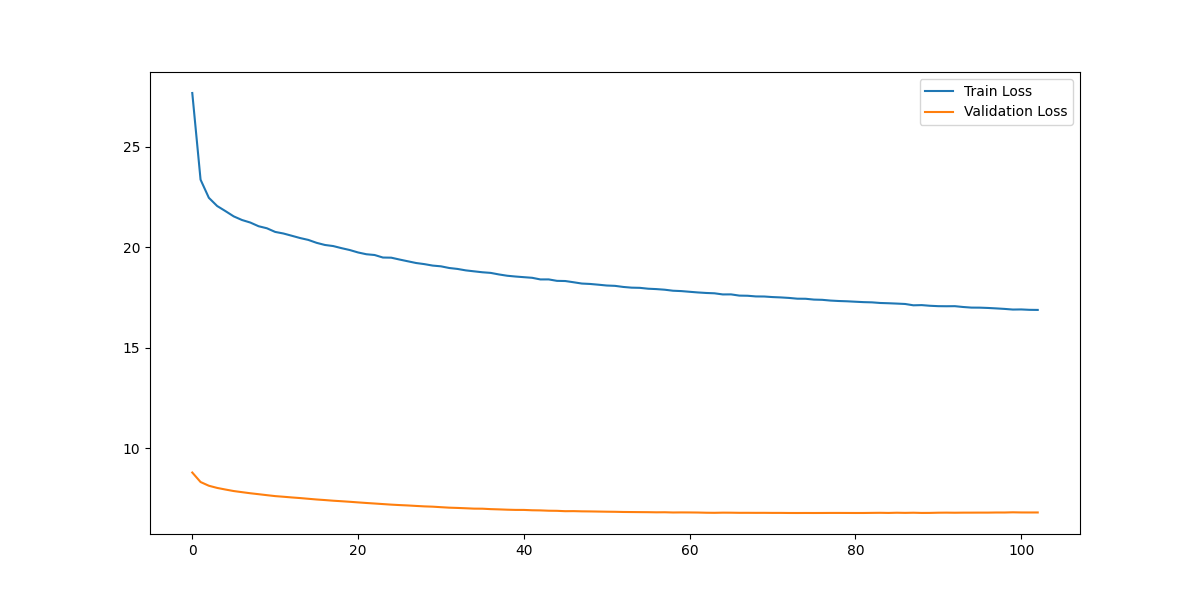

In [ ]:
Image.open("plot_model_multibranch.png")

In [ ]:
!python physionet_challenge/command/train_model.py ../dataset model_multibranch_focal --split split.json --checkpoint checkpoint_other --model multi_focal --monitor val_loss --seed 10 --processing other

2021-01-21 00:33:57.313309: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-21 00:33:57.313370: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running training code...
Found checkpoint
Training model...
194 features
2021-01-21 00:34:23.450199: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-21 00:34:23.452891: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-21 00:34:23.464841: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-21 00:34:23.464904: I tensor

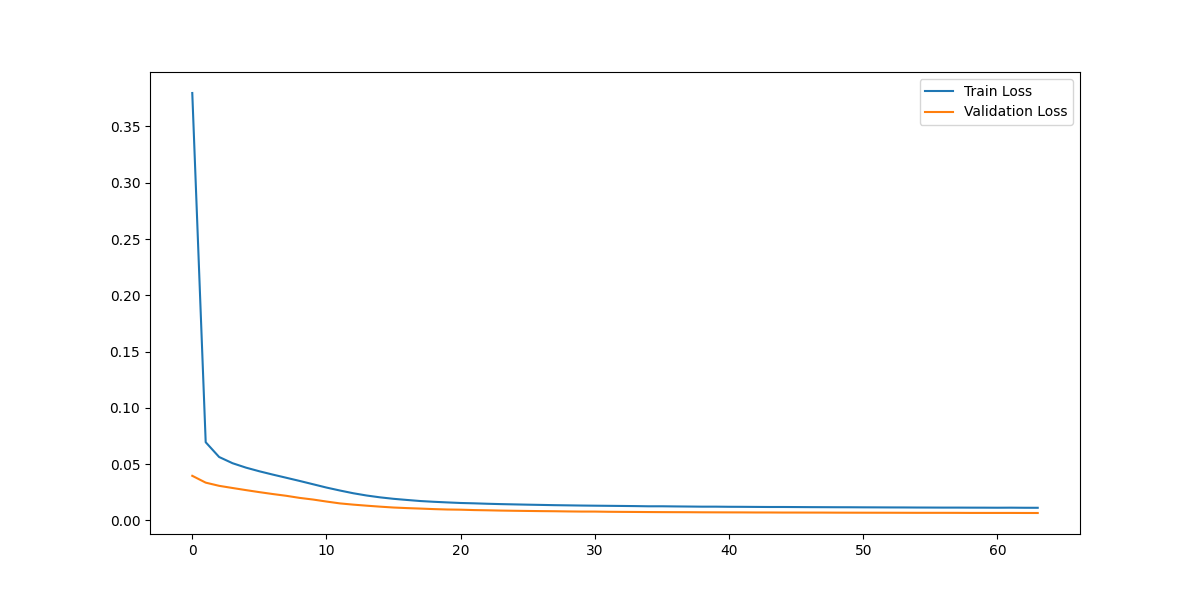

In [ ]:
Image.open("plot_model_multibranch_focal.png")

In [ ]:
!python physionet_challenge/command/train_model.py ../dataset model_multi_big --split split.json --checkpoint checkpoint_other --model multi_big --monitor val_loss --seed 10 --processing other

2021-01-21 00:46:59.445234: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-21 00:46:59.445292: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running training code...
Found checkpoint
Training model...
194 features
2021-01-21 00:47:24.168723: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-21 00:47:24.170550: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-21 00:47:24.182680: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-21 00:47:24.182742: I tensor

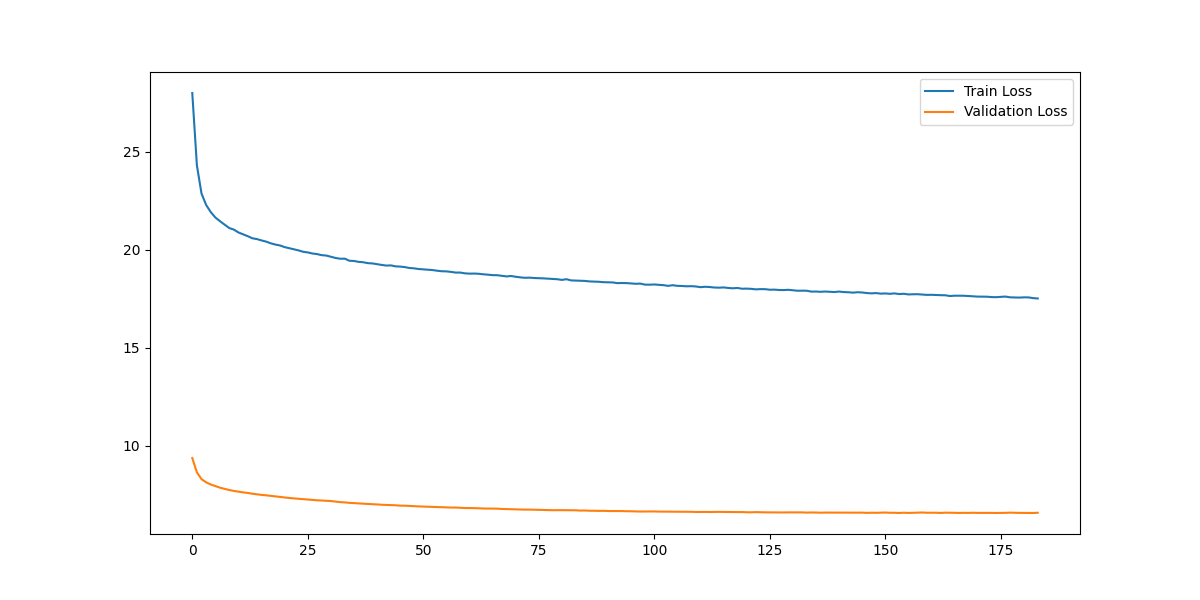

In [ ]:
Image.open("plot_model_multi_big.png")

In [ ]:
!python physionet_challenge/command/train_model.py ../dataset model_tabnet --split split.json --checkpoint checkpoint_other --model tabnet --monitor val_loss --seed 10 --processing other

2021-01-21 01:19:39.779716: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-21 01:19:39.779773: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running training code...
Found checkpoint
Training model...
194 features
2021-01-21 01:20:03.813933: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-21 01:20:03.815305: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-21 01:20:03.827236: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-21 01:20:03.827313: I tensor

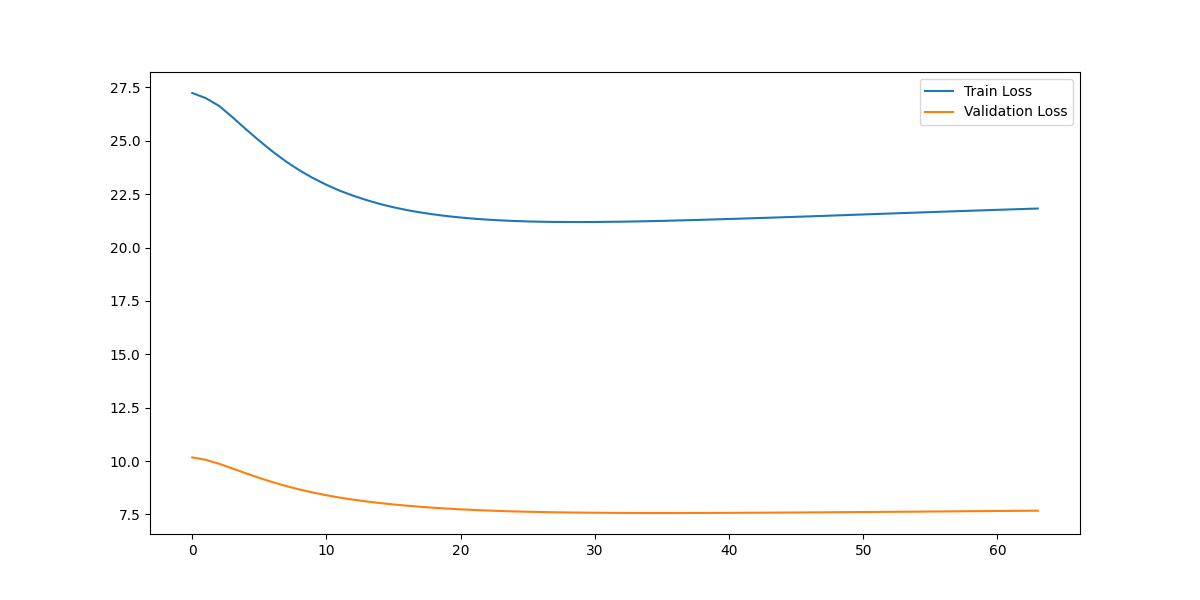

In [ ]:
Image.open("plot_model_tabnet.png")

## Model inference

The model saved in the training step is loaded and used to infer the diagnostics for every recording in the test set. Each inference is saved in a specific inference folder.

In [ ]:
%%bash
datasets="CPSC2018 INCART PTB G12EC"
rm -rf results.txt
rm -rf inference*
for model_folder in model_*; do
  for dataset in $datasets; do
    inference_folder=inference_"$model_folder"_"$dataset"
    echo "===================================================================================================================================" >> results.txt
    echo "Results for $model_folder and $dataset" >> results.txt
    python physionet_challenge/command/inference.py $model_folder ../dataset $inference_folder --split_filepath splits/dataset_split_test.json --split $dataset --processing other
    python physionet_challenge/evaluation/evaluation.py ../dataset $inference_folder splits/dataset_split_test.json $dataset > temp.txt
    tail temp.txt -n 7 >> results.txt
  done
done

cat results.txt

Loaded 2054 subjects from split CPSC2018
Loading 12ECG model...
Making predictions...
	2/2054...
	1002/2054...
	2002/2054...
Done.
Loaded 21 subjects from split INCART
Loading 12ECG model...
Making predictions...
	2/21...
Done.
Loaded 4468 subjects from split PTB
Loading 12ECG model...
Making predictions...
	2/4468...
	1002/4468...
	2002/4468...
	3002/4468...
	4002/4468...
Done.
Loaded 2075 subjects from split G12EC
Loading 12ECG model...
Making predictions...
	2/2075...
	1002/2075...
	2002/2075...
Done.
Loaded 2054 subjects from split CPSC2018
Loading 12ECG model...
Making predictions...
	2/2054...
	1002/2054...
	2002/2054...
Done.
Loaded 21 subjects from split INCART
Loading 12ECG model...
Making predictions...
	2/21...
Done.
Loaded 4468 subjects from split PTB
Loading 12ECG model...
Making predictions...
	2/4468...
	1002/4468...
	2002/4468...
	3002/4468...
	4002/4468...
Done.
Loaded 2075 subjects from split G12EC
Loading 12ECG model...
Making predictions...
	2/2075...
	1002/2075...


2021-01-21 01:24:06.061228: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-21 01:24:06.061358: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-01-21 01:24:26.790633: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-21 01:24:26.792098: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-21 01:24:26.806975: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-21 01:24:26.807146: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not

In [ ]:
!cat results.txt

Results for model_multi_big and CPSC2018
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.643,0.072,0.047,0.074,0.113,0.035,0.220
##################################################
Classes,270492004,164889003,164890007,426627000,713427006,713426002,445118002,39732003,164909002,251146004,698252002,10370003,284470004,427172004,164947007,111975006,164917005,47665007,427393009,426177001,426783006,427084000,164934002,59931005
AUROC,0.536,0.586,0.614,0.749,0.498,0.622,nan,nan,0.737,nan,nan,0.938,0.629,0.655,nan,0.819,nan,nan,0.422,0.935,0.685,0.839,0.577,0.087
AUPRC,0.097,0.147,0.009,0.071,0.200,0.011,nan,nan,0.136,nan,nan,0.008,0.123,0.042,nan,0.003,nan,nan,0.001,0.105,0.141,0.118,0.004,0.001
F-measure,0.150,0.248,0.000,0.137,0.264,0.000,0.000,0.000,0.156,0.000,0.000,0.000,0.180,0.062,0.000,0.000,0.000,0.000,0.000,0.174,0.225,0.170,0.006,0.000
Results for model_multi_big and INCART
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.457

In [ ]:
!python physionet_challenge/command/inference.py model_multibranch ../dataset inference_multibranch --split_filepath split.json --split test  --processing other
!python physionet_challenge/command/inference.py model_multibranch_focal ../dataset inference_multibranch_focal --split_filepath split.json --split test  --processing other
!python physionet_challenge/command/inference.py model_multi_big ../dataset inference_multi_big --split_filepath split.json --split test  --processing other
!python physionet_challenge/command/inference.py model_tabnet ../dataset inference_tabnet --split_filepath split.json --split test  --processing other

2021-01-21 02:08:32.423350: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-21 02:08:32.423411: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Loaded 8618 subjects from split test
Loading 12ECG model...
2021-01-21 02:08:56.825997: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-21 02:08:56.828298: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-21 02:08:56.839966: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-21 02:08:56.840035: I tensorflow/stream_e

## Model evaluation

The inference files are used to compute the metrics.

In [ ]:
import pandas as pd
# Multi-branch big,0.799,0.197,0.299,0.194,0.194,0.091,0.070

txt = """,AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
Multi-branch,0.793,0.184,0.275,0.202,0.218,0.098,0.226
Baseline (MLP),0.799,0.197,0.323,0.183,0.176,0.086,0.079
Multi-branch focal loss,0.773,0.194,0.254,0.041,0.034,0.018,-0.523
TabNet,0.528,0.066,0.125,0.000,0.000,0.000,-0.823
"""
with open("txt.csv", "w") as file:
  file.write(txt)
pd.read_csv("txt.csv",index_col=0)

,AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
Multi-branch,0.793,0.184,0.275,0.202,0.218,0.098,0.226
Baseline (MLP),0.799,0.197,0.323,0.183,0.176,0.086,0.079
Multi-branch focal loss,0.773,0.194,0.254,0.041,0.034,0.018,-0.523
TabNet,0.528,0.066,0.125,0.000,0.000,0.000,-0.823


In [ ]:
!python physionet_challenge/evaluation/evaluation.py ../dataset inference_multibranch split.json test

2021-01-21 02:37:37.466080: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-21 02:37:37.466155: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Loading weights...
Loading label and output files...
Step 1 - finding files.
A6745.hea ../dataset inference_multibranch
Step 2 - load labels
100% 8618/8618 [00:00<00:00, 21876.43it/s]
Step 3 - loading outputs
Evaluating model...
- AUROC and AUPRC...
- Accuracy...
- F-measure...
- F-beta and G-beta measures...
- Challenge metric...
Done.
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.742,0.145,0.152,0.196,0.229,0.090,0.246
##################################################
Classes,270492004,164889003,164890007,42

In [ ]:
!python physionet_challenge/evaluation/evaluation.py ../dataset inference_multibranch_focal split.json test

2021-01-21 02:38:02.170182: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-21 02:38:02.170244: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Loading weights...
Loading label and output files...
Step 1 - finding files.
A6745.hea ../dataset inference_multibranch_focal
Step 2 - load labels
100% 8618/8618 [00:00<00:00, 22037.79it/s]
Step 3 - loading outputs
Evaluating model...
- AUROC and AUPRC...
- Accuracy...
- F-measure...
- F-beta and G-beta measures...
- Challenge metric...
Done.
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.759,0.173,0.233,0.023,0.020,0.010,-0.584
##################################################
Classes,270492004,164889003,16489

In [ ]:
!python physionet_challenge/evaluation/evaluation.py ../dataset inference_tabnet split.json test

2021-01-21 02:38:25.555183: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-21 02:38:25.555239: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Loading weights...
Loading label and output files...
Step 1 - finding files.
A6745.hea ../dataset inference_tabnet
Step 2 - load labels
100% 8618/8618 [00:00<00:00, 23818.40it/s]
Step 3 - loading outputs
Evaluating model...
- AUROC and AUPRC...
- Accuracy...
- F-measure...
- F-beta and G-beta measures...
- Challenge metric...
Done.
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.498,0.062,0.125,0.000,0.000,0.000,-0.823
##################################################
Classes,270492004,164889003,164890007,426627

In [ ]:
!python physionet_challenge/evaluation/evaluation.py ../dataset inference_multi_big split.json test

2021-01-21 02:38:48.696012: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-21 02:38:48.696076: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Loading weights...
Loading label and output files...
Step 1 - finding files.
A6745.hea ../dataset inference_multi_big
Step 2 - load labels
100% 8618/8618 [00:00<00:00, 24093.06it/s]
Step 3 - loading outputs
Evaluating model...
- AUROC and AUPRC...
- Accuracy...
- F-measure...
- F-beta and G-beta measures...
- Challenge metric...
Done.
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.751,0.146,0.206,0.175,0.195,0.080,0.141
##################################################
Classes,270492004,164889003,164890007,4266